# **Load the dataset**

In [1]:
# import necessary libraries
import pandas as pd

df = pd.read_csv('diabetes.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# **Exploratory Data Analysis (EDA)**

In [2]:
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing values check:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10

# **Data Visualization and Set up the plotting style**

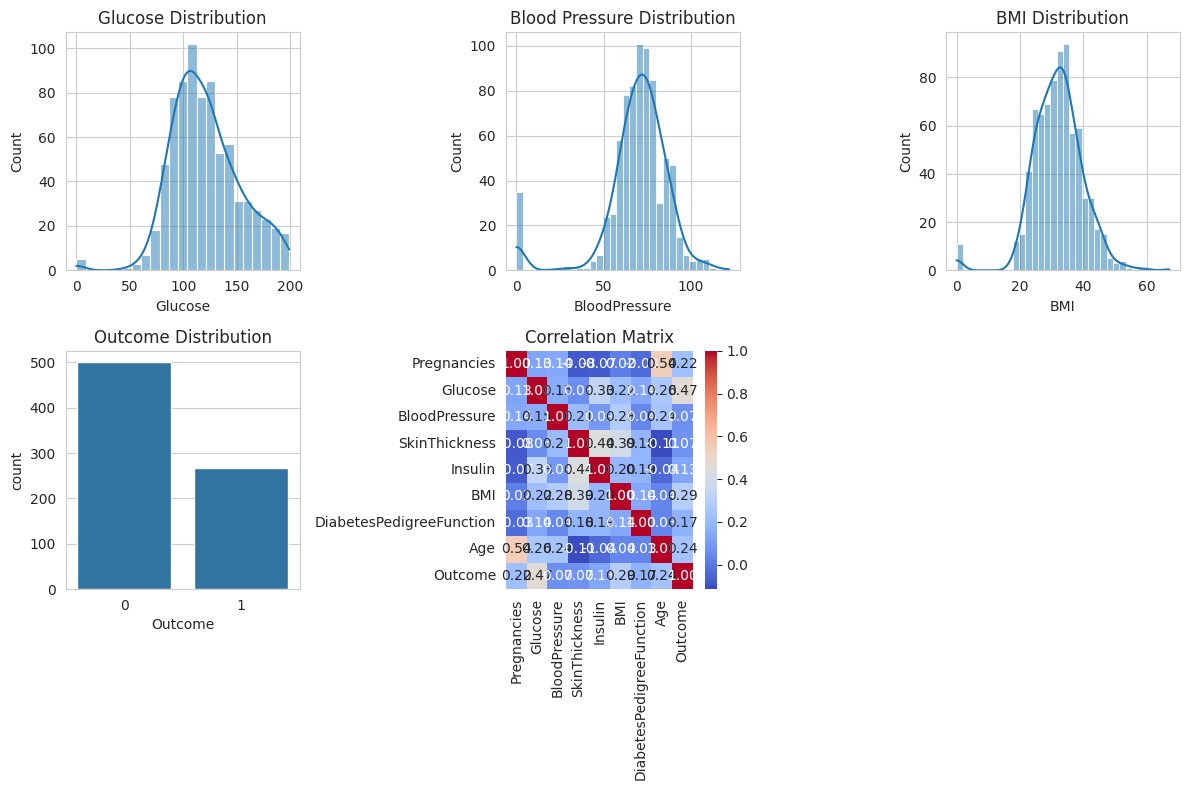

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create subplots
plt.subplot(2, 3, 1)
sns.histplot(df['Glucose'], kde=True)
plt.title('Glucose Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['BloodPressure'], kde=True)
plt.title('Blood Pressure Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')

plt.subplot(2, 3, 5)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.savefig('eda_visualizations.png')
plt.show()

# **Handle zero values in key columns and  Replace zeros with NaN in specific columns**

In [4]:
import numpy as np

zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Check for missing values after replacement
print("Missing values after zero replacement:")
print(df.isnull().sum())

# Fill missing values with median
for column in zero_columns:
    df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values after zero replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-3033936508.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


# **Prepare data for modeling**

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


# **Train multiple models and compare performance**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy
    }

    # Display results in percentage format
    print(f"{name}:")
    print(f"  Cross-validation: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*2*100:.2f}%)")
    print(f"  Test Accuracy: {accuracy*100:.2f}%")
    print("-" * 50)

# Create a summary table
print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)

summary_data = []
for name, result in results.items():
    summary_data.append({
        'Model': name,
        'CV Score': f"{result['cv_mean']*100:.2f}%",
        'CV Std (±)': f"{result['cv_std']*2*100:.2f}%",
        'Test Accuracy': f"{result['accuracy']*100:.2f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("="*60)

Random Forest:
  Cross-validation: 76.88% (+/- 6.74%)
  Test Accuracy: 77.92%
--------------------------------------------------
Logistic Regression:
  Cross-validation: 78.18% (+/- 2.49%)
  Test Accuracy: 70.78%
--------------------------------------------------
SVM:
  Cross-validation: 76.88% (+/- 3.58%)
  Test Accuracy: 74.03%
--------------------------------------------------

MODEL PERFORMANCE SUMMARY
              Model CV Score CV Std (±) Test Accuracy
      Random Forest   76.88%      6.74%        77.92%
Logistic Regression   78.18%      2.49%        70.78%
                SVM   76.88%      3.58%        74.03%


# **Best model selection and save it**

In [7]:
import pickle

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']

print(f"Best model: {best_model_name} with accuracy: {results[best_model_name]['accuracy']:.4f}")

# Save the model and scaler
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")

Best model: Random Forest with accuracy: 0.7792
Model and scaler saved successfully!


# **Evaluate the best model on test data**

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Confusion Matrix:
[[87 13]
 [21 33]]


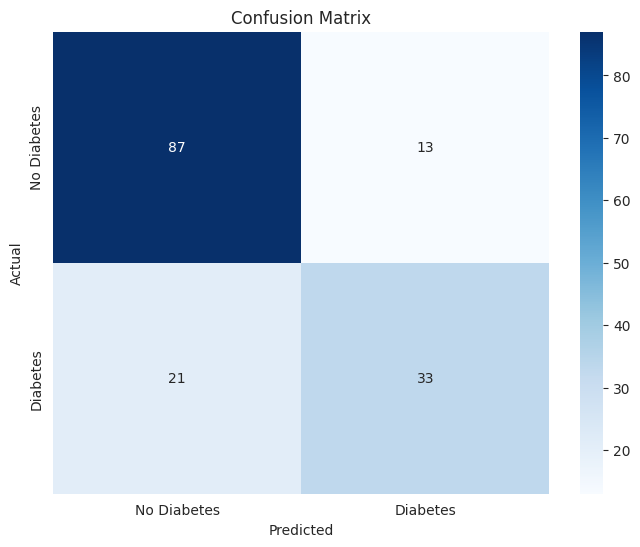

In [8]:
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()